# Part II - YouTube Videos Statistics in Canda
## by Amira Saleh

## Investigation Overview


> **have a look at the behavior of people within the u.s. whilst the use of YouTube,
here is the traits of this look at**:

> 1- Category Field 

> 2- Views

> 3- Likes

> 4- Dislikes




## Dataset Overview

> This dataset is taking about The maximum famous motion pictures on YouTube are determined by way of an expansion of metrics so we want to take a look at the habits of individuals within the usa when the usage of YouTube.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("CAvideos.csv")
df['category_id'] = df['category_id'].astype(str)
df['publish_time'] = df['publish_time'].astype('datetime64')                                           
df['date'] = df['publish_time'].dt.date
youtube_dic = {'1' : "Film & Animation", '2' : "Autos & Vehicles" ,'10' : "Music",
               '15': "Pets & Animals", '17' : "Sports", '18' : "Short Movies", '19' : "Travel & Events" ,
               '20' : "Gaming", '21' : "Videoblogging", '22' :"People & Blogs", '23' :"Comedy" ,
               '24' : "Entertainment", '25' : "News & Politics" ,'26' : "Howto & Style", 
               '27' : "Education", '28':"Science & Technology",'29' :"Nonprofits & Activism", 
               '30':"Movies", '43' :"Shows"}
df.replace({'category_id': youtube_dic}, inplace =True)
df= df.rename(columns = {"category_id": "category_name"})                                 
df_youtube=df.copy()

## Q1 |  Which category type is the most frequent ?

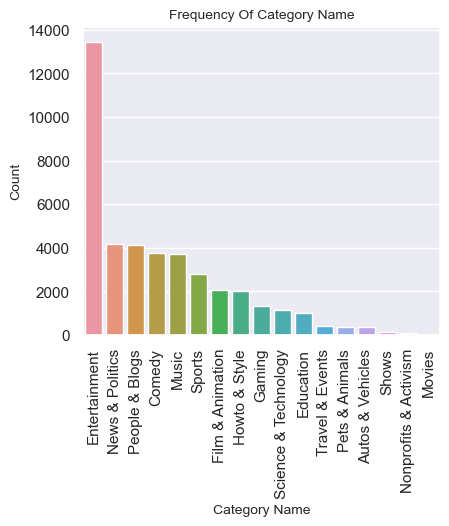

In [16]:
def create_countplot(data, x_column, color=None, order=None):
    if color is not None and order is not None:
        sns.countplot(x=x_column, data=data, color=color, order=order)
    elif color is not None:
        sns.countplot(x=x_column, data=data, color=color)
    elif order is not None:
        sns.countplot(x=x_column, data=data, order=order)
    else:
        sns.countplot(x=x_column, data=data)
create_countplot(df_youtube, 'category_name', order=df_youtube['category_name'].value_counts().index)
plt.xlabel('Category Name', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.title('Frequency Of Category Name', fontsize=10)
#rotates the column names
plt.xticks(rotation=90);
sns.set(rc={'figure.figsize':(4.6,4)})

##### from the plot,  we can see that we have 17 class and the most viwed one is Entertainment,  

## Q2 | What is the the most viewd channel in Canda?

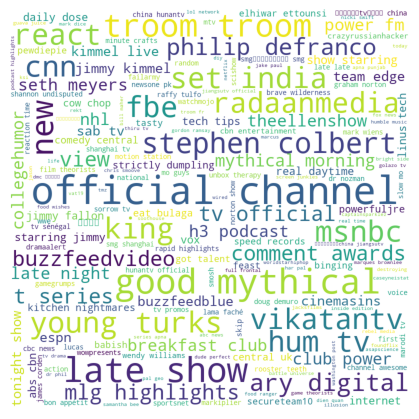

In [17]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_youtube.channel_title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##### As we shall see the most famous who have appointed official channels specialising in music.

## Q3 | Which Category type gets the most likes?

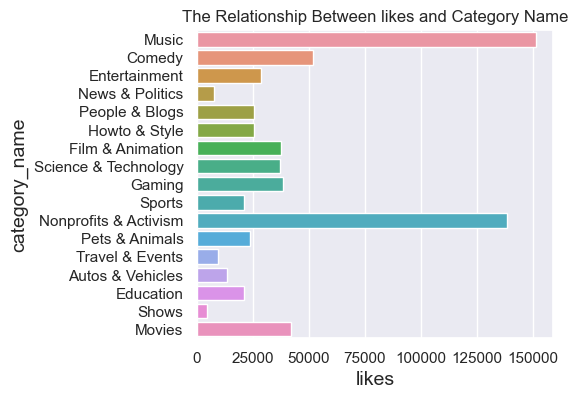

In [18]:
sns.barplot (y = 'category_name', x = 'likes', data = df_youtube, errorbar=None) 
plt.title( "The Relationship Between likes and Category Name")
plt.xlabel ("likes", size=14) 
plt.ylabel ("category_name", size=14);

##### From the plot above, it's obivous that music gets the most. 

## Q4 | Do likes and views  influence each other ?

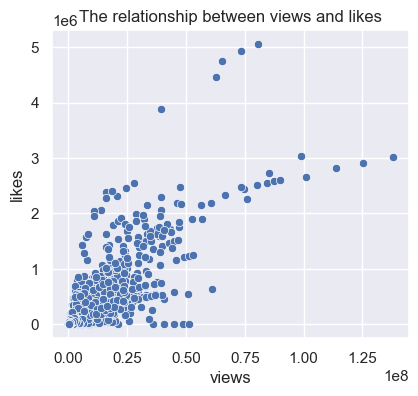

In [19]:
sns.scatterplot(x="views",y="likes",data=df_youtube)
plt.title('The relationship between views and likes');

##### Yes, Because views and tastes are positively correlated, we need to look at the views in order to increase the popularity of any video.

## Q5 | Is there a relationship between Category type and likes?

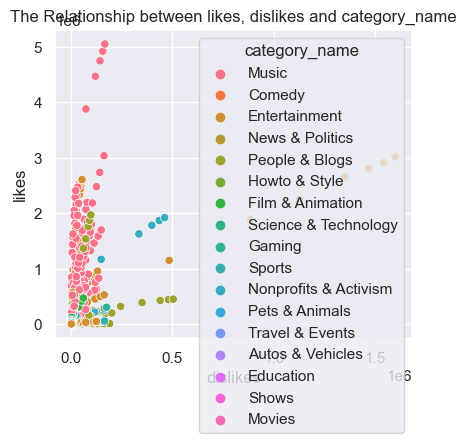

In [20]:
sns.scatterplot(x="dislikes",y="likes",data=df_youtube,hue='category_name')
plt.title("The Relationship between likes, dislikes and category_name");

##### Yes, According to our analysis, there is a higher correlation between News and Politics and Dislikes.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_templateeee-2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_templateeee-2.ipynb to slides
[NbConvertApp] Writing 1102904 bytes to Part_II_slide_deck_templateeee-2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_templateeee-2.slides.html
Use Control-C to stop this server
